In [1]:
# 1. Загрузить набор данных из репозитория. Свой выбор данных  согласовать с преподавателем.
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, RANSACRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("./data/global_cancer_patients_2015_2024.csv")

print(df.info())

df = df.drop_duplicates()
df = df.drop("Patient_ID", axis=1)
df = df.drop("Treatment_Cost_USD", axis=1)
df = df.drop("Year", axis=1)

df.head()

# 5. Отобрать и определить признаки, которые будут использоваться для построения моделей.

important_feat = [
    "Age",
    "Gender",
    "Country_Region",
    "Genetic_Risk",
    "Air_Pollution",
    "Alcohol_Use",
    "Smoking",
    "Obesity_Level",
    "Cancer_Type",
    "Cancer_Stage",
]

numeric_columns = [
    "Age",
    "Genetic_Risk",
    "Air_Pollution",
    "Alcohol_Use",
    "Smoking",
    "Obesity_Level",
    "Survival_Years",
    "Target_Severity_Score",
]

categorical_columns = [
    "Gender",
    "Country_Region",
    "Cancer_Type",
    "Cancer_Stage",
]

target = "Cancer_type"

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

,Age,Gender,Country_Region,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score
0,71,Male,UK,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,5.9,4.92
1,34,Male,China,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,4.7,4.65
2,80,Male,Pakistan,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,7.1,5.84
3,40,Male,UK,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,1.6,3.12
4,43,Female,Brazil,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,2.9,3.62


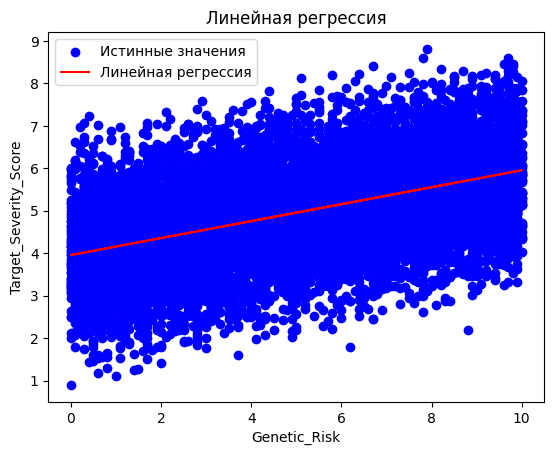

In [2]:
X = df[['Genetic_Risk']]
y = df['Target_Severity_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Истинные значения')
plt.plot(X_test, y_pred, color='red', label='Линейная регрессия')
plt.xlabel('Genetic_Risk')
plt.ylabel('Target_Severity_Score')
plt.legend()
plt.title('Линейная регрессия')
plt.show()


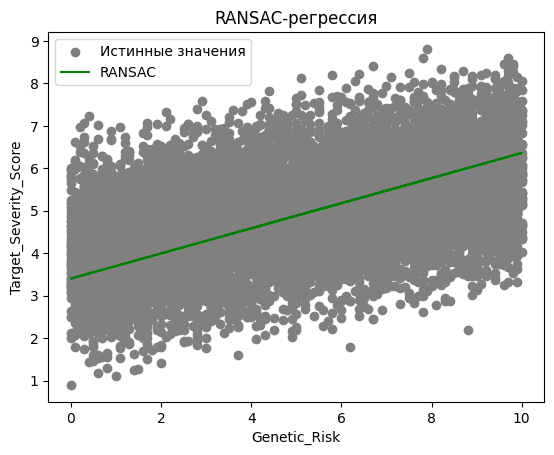

In [3]:
ransac = RANSACRegressor()
ransac.fit(X_train, y_train)
y_ransac = ransac.predict(X_test)

plt.scatter(X_test, y_test, color='gray', label='Истинные значения')
plt.plot(X_test, y_ransac, color='green', label='RANSAC')
plt.xlabel('Genetic_Risk')
plt.ylabel('Target_Severity_Score')
plt.legend()
plt.title('RANSAC-регрессия')
plt.show()


Линейная регрессия:
MSE: 1.10
R^2: 0.23
---
RANSAC:
MSE: 1.18
R^2: 0.17
---


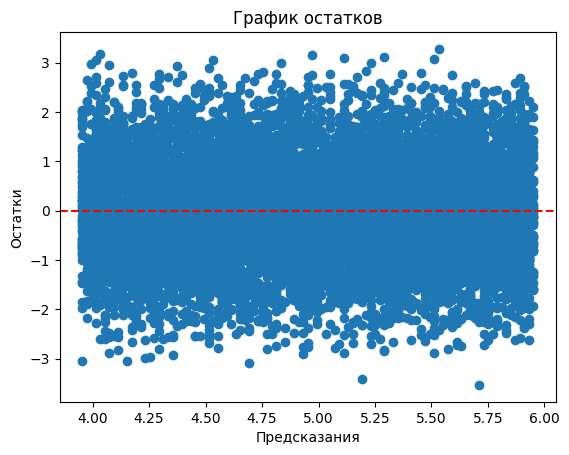

In [4]:
def evaluate_model(y_true, y_pred, name='Модель'):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{name}:')
    print(f'MSE: {mse:.2f}')
    print(f'R^2: {r2:.2f}')
    print('---')

evaluate_model(y_test, y_pred, 'Линейная регрессия')
evaluate_model(y_test, y_ransac, 'RANSAC')

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('График остатков')
plt.xlabel('Предсказания')
plt.ylabel('Остатки')
plt.show()


Ridge:
MSE: 1.10
R^2: 0.23
---
Lasso:
MSE: 1.11
R^2: 0.22
---
ElasticNet:
MSE: 1.10
R^2: 0.22
---


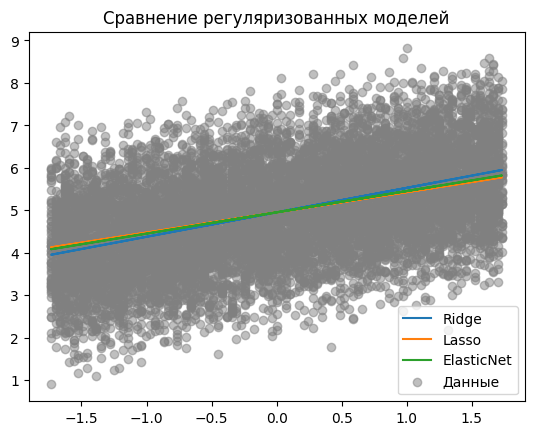

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    evaluate_model(y_test, y_pred, name)

    plt.plot(X_test_scaled, y_pred, label=name)

plt.scatter(X_test_scaled, y_test, color='gray', alpha=0.5, label='Данные')
plt.legend()
plt.title('Сравнение регуляризованных моделей')
plt.show()


In [6]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_poly_pred = poly_model.predict(X_test_poly)
evaluate_model(y_test, y_poly_pred, 'Полиномиальная регрессия')


Полиномиальная регрессия:
MSE: 1.10
R^2: 0.23
---


c:\Users\Kirill\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Kirill\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


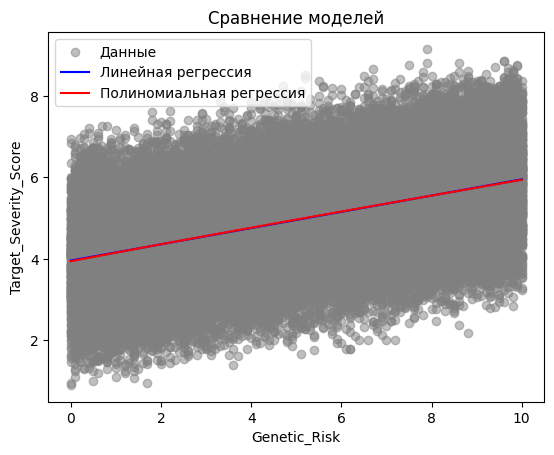

In [ ]:
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_lin = lr.predict(x_range)
y_poly = poly_model.predict(poly.transform(x_range))

plt.scatter(X, y, color='gray', alpha=0.5, label='Данные')
plt.plot(x_range, y_lin, color='blue', label='Линейная регрессия')
plt.plot(x_range, y_poly, color='red', label='Полиномиальная регрессия')
plt.legend()
plt.title('Сравнение моделей')
plt.xlabel('Genetic_Risk')
plt.ylabel('Target_Severity_Score')
plt.show()

In [ ]:
# Использовать метрики оценки регриссеионных моделей и сравнить результаты работы по этим метрикам

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# MSE (Mean Squared Error)	Среднеквадратичная ошибка — чувствительна к выбросам.
# RMSE (Root Mean Squared Error)	Корень из MSE — легче интерпретировать (в тех же единицах, что и целевая переменная).
# MAE (Mean Absolute Error)	Средняя абсолютная ошибка — менее чувствительна к выбросам.
# R² (R-squared, коэффициент детерминации)	Доля объяснённой дисперсии — от 0 до 1 (чем выше, тем лучше).

def evaluate_model_all(y_true, y_pred, name="Модель"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # print(f"{name}")
    # print(f"MSE:  {mse:.4f}")
    # print(f"RMSE: {rmse:.4f}")
    # print(f"MAE:  {mae:.4f}")
    # print(f"R²:   {r2:.4f}")
    # print("-" * 30)

    return {"Model": name, "MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}


results = []

# 1. Линейная регрессия
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results.append(evaluate_model_all(y_test, y_pred_lr, "Linear"))

# 2. RANSAC
ransac = RANSACRegressor()
ransac.fit(X_train, y_train)
y_pred_ransac = ransac.predict(X_test)
results.append(evaluate_model_all(y_test, y_pred_ransac, "RANSAC"))

# 3. Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
results.append(evaluate_model_all(y_test, y_pred_ridge, "Ridge"))

# 4. Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
results.append(evaluate_model_all(y_test, y_pred_lasso, "Lasso"))

# 5. ElasticNet
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train_scaled, y_train)
y_pred_enet = enet.predict(X_test_scaled)
results.append(evaluate_model_all(y_test, y_pred_enet, "ElasticNet"))

# 6. Полиномиальная регрессия
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)
results.append(evaluate_model_all(y_test, y_pred_poly, "Polynomial"))

results_df = pd.DataFrame(results)
results_df.sort_values(by="RMSE")

,Model,MSE,RMSE,MAE,R2
2,Ridge,1.098067,1.047887,0.847427,0.227186
0,Linear,1.098067,1.047887,0.847427,0.227185
5,Polynomial,1.098123,1.047914,0.847437,0.227146
4,ElasticNet,1.102405,1.049955,0.848893,0.224132
3,Lasso,1.106358,1.051836,0.850287,0.221350
1,RANSAC,1.118811,1.057739,0.854643,0.212586
